In [1]:
import json
import numpy as np
import h5py
import matplotlib.pyplot as plt

In /home/atlantis/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/atlantis/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/atlantis/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/atlantis/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/atlantis/.local/lib/python3.6/site-packages/matplotlib/

In [2]:
class ImageHandler:
    def __init__(self, path='data02/'):
        self.map_images = []
        with open(path + 'map.json','r') as file:
            map_info = json.load(file)
            for image_name in map_info['im_paths']:
                self.map_images.append(plt.imread(path + image_name))
        self.map_images = np.array(self.map_images)
        
        self.query_images = []
        with open(path + 'query.json','r') as file:
            query_info = json.load(file)
            for image_name in query_info['im_paths']:
                self.query_images.append(plt.imread(path + image_name))
        self.query_images = np.array(self.query_images)
        
    def map_image(self, i):
        return self.map_images[i]

    def query_image(self, i):
        return self.query_images[i]

def plot(img):
    plt.imshow(img)
    plt.show()


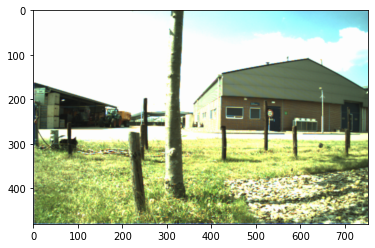

In [3]:
handler = ImageHandler()
a = handler.query_image(10)
plot(a)


In [4]:
from sklearn import decomposition

pca = decomposition.PCA(50)
map_data = np.copy(handler.map_images)
map_data = map_data.reshape(100, 480*752*3)
pca.fit(map_data)

PCA(n_components=50)

In [7]:
eigenvalues = pca.components_.reshape(50,480,752,3)

# enable if you want to see the eingenfaces
if False:
    for i in range(10):
        plot(eigenvalues[i]*2000)

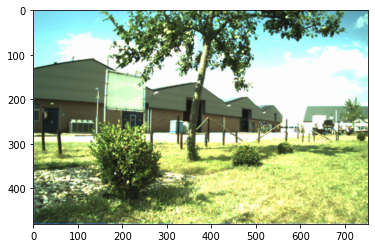

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


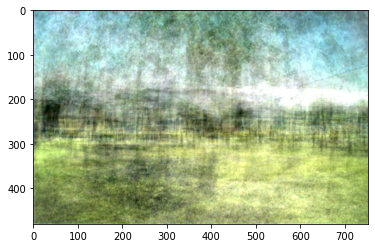

In [21]:
# Non seen data:
img_orig = handler.query_image(20)
img = pca.transform(img_orig.reshape(1, 480*752*3))
img = pca.inverse_transform(img).reshape(480, 752, 3)
plot(img_orig)
plot(img)

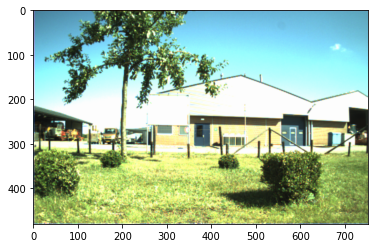

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


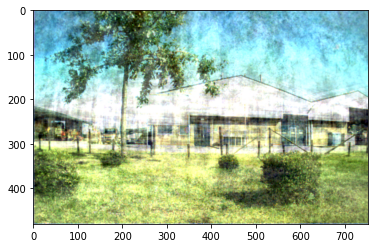

In [22]:
# Non seen data:
img_orig = handler.map_image(20)
img = pca.transform(img_orig.reshape(1, 480*752*3))
img = pca.inverse_transform(img).reshape(480, 752, 3)
plot(img_orig)
plot(img)